# Quiz \#3: Rendering Shapes

## Basic graphics in Python

This quiz uses the Python Imaging Library (PIL) to draw various shapes into images. In later exercises, these shapes are moved, rotated, and eventually made in "3D" (perspective projection). This is a great opportunity to learn the wonderful `numpy` library.

## Example output

Using my code from this quiz, I created some "spheres" and made them orbit (rotate) around the origin, here it's the sun. As you can see, the illusion of distance comes from growing and shrinking the circles.

![Solar system](./Images/orbit.gif)

## How to use this quiz

### On your computer

* Instructions: https://jupyter.org/install

If you have basic Python with pip, use `pip install jupyterlab` to install Jupyter lab. You can then download with `.ipynb` file to your computer, and then start `jupyter lab` to open it.

If you have Anaconda, you can install Jupyter with `conda install -c conda-forge jupyterlab`.

### With Google Colab

Google Colab is a free hosted Jupyter Notebook: https://colab.research.google.com/notebooks/welcome.ipynb

It allows you to open a Notebook from GitHub. Paste this Notebook's url into Colab to open it.

In Google Colab, you can update Python packages with pip, for example `pip install pandas --upgrade`.

In [1]:
# You are likely to use these libraries
from PIL import Image, ImageDraw
import numpy as np

In [2]:
# If you use the trick to display GIFs in Jupyter
from IPython.display import HTML

# Exercise 1: draw a square

Pillow is a a fork of PIL (Python Imaging Library). It lets you work with images in Python. You can use it to draw shapes onto a canvas, animate GIFs, and save images to file. It's like MSPaint or a mini-photoshop in your Python session.

* PIL documentation: https://pillow.readthedocs.io/en/stable/

We'll start with drawing basic shapes onto a canvas.

* Image class documentation: https://pillow.readthedocs.io/en/stable/reference/Image.html
* Draw module documentation: https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html

When drawing shapes, remember that 0,0 is at the top left of the canvas.

**Goal: draw a rectangle, an ellipse, and an equilateral triangle.**

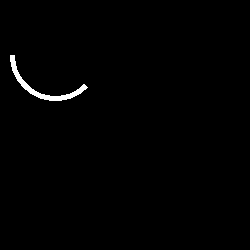

In [3]:
# Start a new blank canvas
image = Image.new("RGB", (250, 250))

# Use the draw object to draw objects
draw = ImageDraw.Draw(image)

# For example, here is an arc
draw.arc(xy=[(10, 10), (100, 100)],
         start=45,
         end=180,
         fill="white",
         width=5)

# In Jupyter, this will display the image
image

# Goal: draw the following:
#       a) a rectangle
#       b) an ellipse
#       c) an equilateral triangle

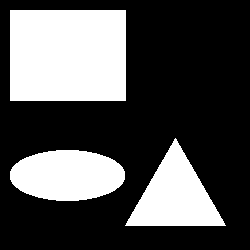

In [4]:
# Start a new blank canvas
image = Image.new("RGB", (250, 250))

# Use the draw object to draw objects
draw = ImageDraw.Draw(image)

# Rectangle
# https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.PIL.ImageDraw.ImageDraw.rectangle
draw.rectangle(xy=[(10, 10), (125, 100)],
         fill="white",
         width=5)

# Ellipse
# https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.PIL.ImageDraw.ImageDraw.ellipse
draw.ellipse(xy=[(10, 150), (125, 200)],
         fill="white",
         width=5)

# Equilateral triangle
# https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.PIL.ImageDraw.ImageDraw.polygon
w = 100
# triangle height
# h**2 + (w**2)/4 = w**2 --> h = np.sqrt(3/4 * w**2)
h = np.sqrt(3/4 * w**2)
draw.polygon(xy=[(125, 225), (125+w, 225), (125+w/2, 225-h)],
         fill="white")

# In Jupyter, this will display the image
image

# Exercise 2: Draw a chessboard pattern

Using the Pillow library, draw a checkerboard pattern onto the canvas. The size, position, and color don't matter as long as it looks vaguely like a checkerboard pattern.

![Checkerboard](./Images/checkerboard.jpg)

## Hints

* The PIL library wants its inner coordinates in tuples, like this: `[(x1, y1), (x2, y2)]` In Python the round parentheses `( )` signify a tuple, the square brackets `[ ]` signify a list.
    * If you have a nested list like this `coords = [[x1, y1], [x2, y2]]` you can convert it like this `coords = [tuple(i) for i in coords]` which will give `[(x1, y1), (x2, y2)]`

**Goal: draw a checkerboard with PIL**

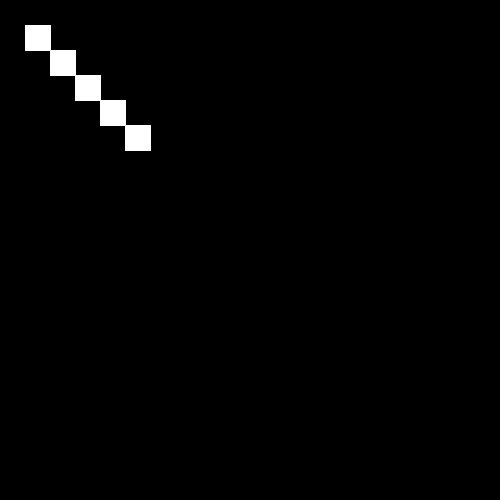

In [5]:
image = Image.new("RGB", (500, 500))
draw = ImageDraw.Draw(image)

# Here is a starter example
origin = np.array([25, 25])
for i in range(5):
    draw.rectangle(xy=[tuple(origin +     i*np.array([25, 25])),
                       tuple(origin + (i+1)*np.array([25, 25]))],
                  fill="white")

# In Jupyter, this will display the image
image

# Goal: draw a checkerboard pattern

In [6]:
#
# SOLUTION 2
#
class GridCanvas():
    """Instantiates a drawing area for PIL polygons"""
    def __init__(self, width=500, height=500, spacing=50, grid=True, color="white"):
        """PIL Image and ImageDraw objects are initialized, with an
        optional grid.
        """
        # Creating the Image and the ImageDraw
        self.image = Image.new('RGB', (width, height), color=color)
        self.draw = ImageDraw.Draw(self.image)
        # Calculating the center of the canvas, the drawing area
        self.cx = width // 2
        self.cy = height // 2
        # If grid is set to True, draw a grid
        if grid:
            for x in range(self.cx % spacing, width, spacing):
                # Dark grey vertical lines are drawn at every `spacing`
                # interval
                self.draw.line(((x, 0), (x, height)), (200, 200, 200), 1)
            for y in range(self.cy % spacing, height, spacing):
                # The horizontal lines are drawn
                self.draw.line(((0, y), (width, y)), (200, 200, 200), 1)
            # Thicker lines are drawn for x=0 and y=0
            self.draw.line(((self.cx, 0), (self.cx, height)), (200, 200, 200), 3)
            self.draw.line(((0, self.cy), (width, self.cy)), (200, 200, 200), 3)
    def draw_polygon(self, coords, color=0, flip_y=True, center=True):
        """Draw a polygon on the canvas"""
        coords = self.validate_coords(coords) # check that these are valid coordinates
        if flip_y:
            coords = coords * (1, -1)         # With PIL, y must be flipped
        if center:
            coords = self.from_origin(coords) # center the coordinates to the center
        coords = self.to_tuple(coords)        # transform the array to a list of tuples
        self.draw.polygon(coords, fill=color, outline=color)
    def draw_text(self, x, y, string, color=0, flip_y=True, center=True):
        """Write text on the canvas"""
        if flip_y:
            y *= -1
        if center:
            x += self.cx
            y += self.cy
        self.draw.text((x, y), string, fill=color)
    def from_origin(self, coords):
        """Makes coordinates relative to the top-left corner.
        
        PIL coordinates are not relative to the 0,0 origin (the center
        of the canvas). This methods accepts coordinates that are relative
        to 0,0 and converts them to PIL coordinates
        """
        return coords + (self.cx, self.cy)
    @staticmethod
    def to_tuple(coords):
        """Converts numpy array to nested tuples required by PIL"""
        return [(x, y) for x, y in coords.tolist()]
    @staticmethod
    def validate_coords(coords):
        """Runs test on coordinates to determine whether they are
        valid or not.
        
        Coordinates must be in a numpy array of dimensions Nx2, where
        N is the number of rows (the number of sets of x, y coordinates).
        """
        if type(coords) is not np.ndarray:
            raise TypeError("`coords` must be a numpy array")
        if coords.ndim != 2 or coords.shape[1] != 2:
            raise ValueError("`coords` must be a Nx2 matrix")
        return coords
    def display(self):
        """Returns the image object, which renders the image in Jupyter."""
        return self.image

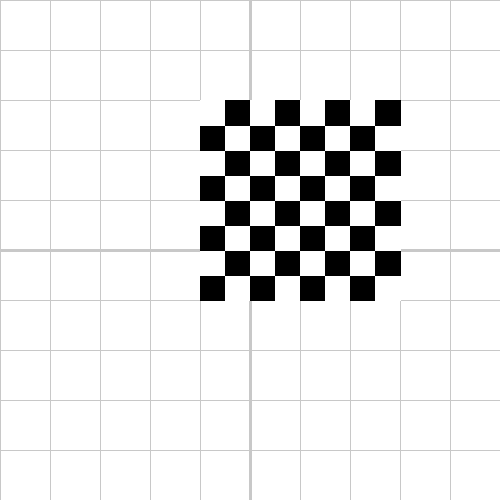

In [7]:
# Create a canvas
image = GridCanvas(500, 500)

# Set the height and width of each cell to 25 pixels
size = 25
for i in range(8*8):
    # For each cell in 8x8=64, set the color to black when an even
    # number, else white
    if (i + i // 8) % 2 == 0:
        color = "black"
    else:
        color = "white"
    
    # Define the polygon vertices
    # The modulo % operator causes x coordinates to run through a row
    # and the return back at 8, 16, etc.
    # The integer division operator // causes y coordinates to shift 
    # down a row only when i is greater than 8, 16, etc.
    polygon = np.array([
        (0+(i%8)*size, 0+(i//8)*size),
        (size+(i%8)*size, 0+(i//8)*size),
        (size+(i%8)*size, size+(i//8)*size),
        (0+(i%8)*size, size+(i//8)*size)
    ])
    
    # Since `polygon` is a numpy array, all coordinates can be shifted
    # towards the center by adding (-50, -50)
    image.draw_polygon(polygon + (-50, -50), color=color, center=True)

image.display()

# Exercise 3: Transform a square

Shapes can undergo several transformations:

  * Translation (movement)
  * Rotation
  * Stretching (scaling)
  * Shearing (slanting)
  * Reflection (flipping)

![Output](./Images/transformations.png)

Translation is easy to grasp, but the other transformations are a bit more complicated. Luckily, Wikipedia has them all:

* Transformation matrices: https://en.wikipedia.org/wiki/Transformation_matrix#Examples_in_2D_computer_graphics

Matrices are a convenient way of transforming coordinates. With the right matrix, you can morph your shapes the way you want to. In order to apply these, you use the np.dot() function in numpy to perform a dot product.

* A popular visual guide to linear transformations: https://www.youtube.com/watch?v=kYB8IZa5AuE
* Matrix multiplication: https://www.youtube.com/watch?v=XkY2DOUCWMU

## Hints

* All computer graphics stuff I've seen use coordinates in column/vertical format. To switch between formats, use the `.transpose()` method on your numpy array. Example: `np.array([[1, 2]]).transpose() --> array([[1], [2]])`
* The numpy documentation is very helpful.
* You can find a matrix's size and shape with its .shape property.
    * Example: `np.array([[1, 2]]).shape --> (2, 1)`
* If you add a smaller matrix to a larger one, numpy will try to broadcast the smaller one. For example, you can add (0, 1) to a matrix of (x, y) coordinates to add 1 to each y coordinate.
    * Here is a better explanation: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

**Goal: Given a square, translate it, rotate it, stretch it, shear it, and reflect it.**

In [8]:
#
# SOLUTION 3
#
# This class will let us create squares and transform them as desired.
class Square():
    """An object that stores the coordinates of each point of a square."""
    def __init__(self, minx, miny, length):
        """Given the bottom left point of the square (`minx`, `miny`)
        the rest of the points are calculated with `length`, the length
        of each edge.
        """
        self.coords = np.array(
            [[minx, miny, 0, 1],
             [minx, miny+length, 0, 1],
             [minx+length, miny+length, 0, 1],
             [minx+length, miny, 0, 1]]
        )
    @staticmethod
    def t_dot_t(m, coords):
        """Transposes coordinates, performs dot product with m, and
        transposes back the results.
        
        All coordinates are written in horizontal format but transformation
        matrices are in vertical (column major) format. In order to use the
        two together, coordinates have to be transposed before applying the
        transformation matrices by dot product.
        """
        coords = coords.transpose()
        coords = np.dot(m, coords)
        return coords.transpose()
    def translate(self, x=0, y=0, z=0):
        """Translates coordinates by `x`, `y`, `z`
        
        What this does: the x, y, z arguments are added to the
        x,y,z coordinates.
        """
        m = np.array(
            [
                [1, 0, 0, x],
                [0, 1, 0, y],
                [0, 0, 1, z],
                [0, 0, 0, 1]
            ])
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def stretch(self, x=1, y=1, z=1):
        """Stretches coordinates along the x, y, z axes by factors
        specified by `x`, `y`, `z`, respectively.
        
        What this does: the x, y, z coordinates are multiplied by the
        x, y, z arguments. Note that the stretching is done in reference
        to the origin, so to grow/scale an object the object must be at
        the origin.
        """
        m = np.array(
            [
                [x, 0, 0, 0],
                [0, y, 0, 0],
                [0, 0, z, 0],
                [0, 0, 0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def shear(self, xy=0, xz=0, yz=0):
        """Shears (or slants) coordinates along two axes.
        
        What this does: similar to a translation except that the 
        movement depends on other dimensions. The higher a point is
        on the y-plane, the more it is sheared left/right along the
        x-plane, for example.
        """
        m = np.array(
            [
                [1,xy,xz, 0],
                [0, 1,yz, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def rotate_z(self, angle=0):
        """Rotates coordinates around the z-axis, which passes through
        x, y = (0, 0), the origin.
        
        What this does: this is rotation around the z-axis, which
        is (0,0) in the 2D xy plane. My way of understanding this
        is as simultaneously shearing and stretching.
        
        Parameters
        ----------
        angle : float
            angle in radians (180 degres == pi rad)
        
        Returns
        -------
        
        self : Square
            The objects returns itself, to enable method cascading
        """
        m = np.array(
            [
                [np.cos(angle), -np.sin(angle), 0, 0],
                [np.sin(angle),  np.cos(angle), 0, 0],
                [            0,              0, 1, 0],
                [            0,              0, 0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def reflect(self, x=False, y=False, z=False):
        """Reflects/mirrors coordinates across the axes `x`, `y`, `z`
        that are set to True/
        
        What this does: multiplying coordinates by -1 flips
        them.
        """
        if x: x = -1
        else: x =  1
        if y: y = -1
        else: y =  1
        if z: z = -1
        else: z =  1
        m = np.array(
            [
                [x, 0, 0, 0],
                [0, y, 0, 0],
                [0, 0, z, 0],
                [0, 0, 0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def to_euclidean(self):
        """Divides coordinates by w.
        
        This makes the homogeneous coordinates appear Euclidean, if one
        were to only look at the first three dimensions.
        
        This is done by dividing all values by w, effectively setting w
        back to 1.
        """
        self.coords = self.coords / self.coords[:,3,np.newaxis]
        return self
    def to_2d(self):
        """Converts coordinates to 2D Euclidean coordinates.
        
        This is done by deleting columns 3 and 4, which are the columns
        for the z and w.
        """
        self = self.to_euclidean()
        self.coords = self.coords[:,:2]
        return self

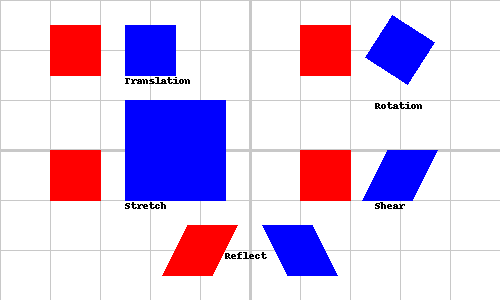

In [9]:
# Create a drawing area
canvas = GridCanvas(500, 300)

# Translation
canvas.draw_polygon(
    Square(-200, 75, 50)
    .to_2d()
    .coords, center=True, color="Red")
canvas.draw_polygon(
    Square(-200, 75, 50)
    .translate(x=75)
    .to_2d()
    .coords, center=True, color="Blue")
canvas.draw_text(-125, 75, "Translation")

# Rotation
canvas.draw_polygon(
    Square(50, 75, 50)
    .to_2d()
    .coords, center=True, color="Red")
canvas.draw_polygon(
    Square(-25, -25, 50)
    .rotate_z(1)
    .translate(x=150, y=100)
    .to_2d()
    .coords, center=True, color="Blue")
canvas.draw_text(125, 50, "Rotation")

# Stretch
canvas.draw_polygon(
    Square(-200, -50, 50)
    .to_2d()
    .coords, center=True, color="Red")
canvas.draw_polygon(
    Square(-25, -25, 50)
    .stretch(x=2, y=2)
    .translate(x=-75, y=0)
    .to_2d()
    .coords, center=True, color="Blue")
canvas.draw_text(-125, -50, "Stretch")

# Shear
canvas.draw_polygon(
    Square(50, -50, 50)
    .to_2d()
    .coords, center=True, color="Red")
canvas.draw_polygon(
    Square(-25, -25, 50)
    .shear(xy=0.5)
    .translate(x=150, y=-25)
    .to_2d()
    .coords, center=True, color="Blue")
canvas.draw_text(125, -50, "Shear")

# Reflect
canvas.draw_polygon(
    Square(-25, -25, 50)
    .shear(xy=0.5)
    .translate(x=-50, y=-100)
    .to_2d()
    .coords, center=True, color="Red")
canvas.draw_polygon(
    Square(-25, -25, 50)
    .shear(xy=0.5)
    .translate(x=-50, y=-100)
    .reflect(x=True)
    .to_2d()
    .coords, center=True, color="Blue")
canvas.draw_text(-25, -100, "Reflect")

canvas.display()

# Exercise 4: Project a 3D checkerboard into 2D

In order to view a 3D object on your computer monitor, it has to be "squished" into 2D. Imaging painting a scene onto canvas: how do you paint objects to make them seem real? When painting, you need to transform the 3D scene in your mind to a 2D representation on the canvas. You can do this with perspective.

* Example of perspective: https://upload.wikimedia.org/wikipedia/commons/6/6b/One_point_perspective.jpg

The transformation from 3D to 2D is a projection. In particular, this one is known as the perspective projection, a projection that gives the illusion of depth. Other projections are the orthogonal projection (seen in design diagrams) and the Mercator projection (squish the Earth into a rectangular map).

* Information about 3D projections, including parallel projections: https://en.wikipedia.org/wiki/3D_projection
  * In particular, SimCity used a military projection. See how building height is handled? https://commons.wikimedia.org/wiki/File:SimCity-Indigo.gif
* Video animation demonstrating the Mercator projection: https://www.youtube.com/watch?v=CPQZ7NcQ6YQ

For this exercise, transform your 2D checkerboard into 3D, tilt it back, and perform the perspective projection. It should look like this:

![Checkered road](./Images/checker_road.jpg)

As you can see, the perspective projection shears shapes to give the sense of depth.

## Hints

* There is a ton of resources on this topic online. If you Google the OpenGL graphics library, you can find out how it does 3D rendering.
* 3D rendering is usually done in homogeneous coordinates, which are coordinates in $(x, y, z, w)$. The point $(x, y, z, w)$ becomes $(x/w, y/w, z/w)$ in Euclidean coordinates.

**Goal: render a 3D checkboard onto a 2D image**

In [10]:
#
# SOLUTION 4
#
# Explanation: we extend the Square class to work in 3D
class Square(Square):
    def rotate_x(self, angle=0):
        """Rotates coordinates around the x axis.
        
        Parameters
        ----------
        angle : float
            angle in radians (180 degres == pi rad)
        
        Returns
        -------
        
        self : Square
            The objects returns itself, to enable method cascading
        """
        m = np.array(
            [
                [1,             0,              0, 0],
                [0, np.cos(angle), -np.sin(angle), 0],
                [0, np.sin(angle),  np.cos(angle), 0],
                [0,             0,              0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def rotate_y(self, angle=0):
        """Rotates coordinates around the y axis.
        
        Parameters
        ----------
        angle : float
            angle in radians (180 degres == pi rad)
        
        Returns
        -------
        
        self : Square
            The objects returns itself, to enable method cascading
        """
        m = np.array(
            [
                [ np.cos(angle), 0, np.sin(angle), 0],
                [            0,  1,             0, 0],
                [-np.sin(angle), 0, np.cos(angle), 0],
                [            0,  0,             0, 1]
            ]
        )
        self.coords = self.t_dot_t(m, self.coords)
        return self
    def perspective_projection(self, viewsize=250, fov=90, n=0, f=-1000):
        """Performs a perspective projection of coordinates
        
        This is a standard 3D perspective projectio. It gives the impression
        that 2D shapes are 3D. Effecively, it makes more distant points smaller
        and closer together (perspective).
        
        Parameters
        ----------
        viewsize : float
            the size of the camera's view, in pixels
        fov : float
            field of vision
        n : float
            near clipping plane
        f : float
            far clipping plane
        
        Returns
        -------
        
        self : Square
            The objects returns itself, to enable method cascading
        """
        coords = self.coords.transpose()
        # The below sets w to z, squishing everything nearer to -1, 1
        m = np.array([
            [ np.arctan(fov/2),                 0,             0,           0],
            [                0,  np.arctan(fov/2),             0,           0],
            [                0,                 0,  -(f+n)/(f-n), 2*n*f/(f-n)],
            [                0,                 0,            -1,           0]
        ])
        coords = np.dot(m, coords).transpose()
        # Instead of -1, 1, we instead want -250, 250 if we 
        # have a grid of 500 wide
        coords[:,:2] = viewsize * coords[:,:2]
        self.coords = coords
        return self

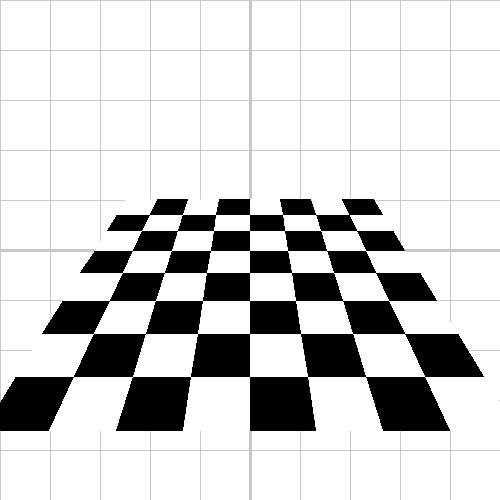

In [11]:
image = GridCanvas(500, 500)

size = 50
for i in range(8*8):
    if (i + i // 8) % 2 == 0:
        color = "black"
    else:
        color = "white"
    
    # Below the transformations are chained
    #
    # In 3D graphics, there are concepts known as coordinate systems,
    # such as local space, global space, etc. The local space is
    # relative to the object (the object is the center of the universe).
    # As the scene is built, the center changes to accomodate other
    # objects, cameras, etc.
    #
    # Why this is important: you want to do these things in the right 
    # order so that your transformations behave as expected. Our
    # rotation functions spin objects around the origin, so if you
    # translate them first, they'll orbit the center of the scene
    # instead of just spinning.
    cell = (Square(0+(i%8)*size-250, 0+(i//8)*size-250, size)
            .rotate_x(-1) # Do the rotation while in local space
            .translate(x=50, y=0, z=-500) # This translation moves us to global space
            .to_euclidean()
            .perspective_projection() # Move to clipping space
            .to_euclidean()
            .to_2d())
    
    # When drawing the scene in PIL, we go to screen space
    image.draw_polygon(cell.coords, color=color, center=True)

image.display()

# Bonus 1: Render a spinning cube

You can render a cube by rendering 6 square planes (polygons) together. This will work if these cube faces stay properly aligned with one another.

In order to render a solid cube properly, you will need to know which surface to render over which. Objects that are nearer should cover those that are further away.

* With multiple `Image` PIL objects, you can `.append` them into an animated GIF: https://pillow.readthedocs.io/en/stable/releasenotes/3.4.0.html#append-images-to-gif
* You can open GIFs to view them, or you can display GIFs in Jupyter using HTML: https://github.com/ipython/ipython/issues/10045

![Cube](./Images/cube.gif)

**Goal: render a spinning 3D cube**

In [12]:
#
# SOLUTION BONUS 1
#
class Cube(Square):
    """Stores and operates on cube vertices
    
    This inherits the Square class and all of its transformation methods.
    However, the Cube class is initialized differently, in order to the
    series of coordinates that make up the square.
    
    Attributes
    ----------
    coords : np.array
        Coordinates of cube points
    a, b, c, d, e, f : list
        Group the *indexes* of the vertices of each cube facing
    
    Methods
    -------
    get_faces(self)
        Retrieves the coordinates of a, b, c, d, e, f above
    """
    def __init__(self, minx, miny, minz, l):
        """Initialize a cube.
        
        Implementation note: when listing the points of each face, it's
        important to be consistent with their ordering. Below, each face
        is looked at from outside the cube, and its points are listed in
        clockwise order. Later, when applying lighting, the ordering
        will be used to determine which direction the faces are "facing".
        
        Parameters
        ----------
        minx : float
            x coordinate for far-bottom-left corner of cube
        miny : float
            y coordinate for far-bottom-left corner of cube
        minz : float
            z coordinate for far-bottom-left corner of cube
        l : float
            length of cube's edges
        """
        self.coords = np.array(
            [
                [ minx,    miny,   minz, 1],
                [ minx,    miny, minz+l, 1],
                [ minx,  miny+l,   minz, 1],
                [ minx,  miny+l, minz+l, 1],
                [minx+l,   miny,   minz, 1],
                [minx+l,   miny, minz+l, 1],
                [minx+l, miny+l,   minz, 1],
                [minx+l, miny+l, minz+l, 1]
            ]
        )
        # Face indexes
        self.a = [0, 2, 6, 4]
        self.b = [4, 6, 7, 5]
        self.c = [2, 3, 7, 6]
        self.d = [0, 4, 5, 1]
        self.e = [0, 1, 3, 2]
        self.f = [1, 5, 7, 3]
    def get_faces(self):
        """Retrieve and return the coordinates behind the cube faces."""
        faces = [
            self.coords[self.a],
            self.coords[self.b],
            self.coords[self.c],
            self.coords[self.d],
            self.coords[self.e],
            self.coords[self.f]
        ]
        return faces
    def get_inc_prox(self):
        """Return the faces in order of proximity to the camera."""
        faces = np.array(self.get_faces())
        mean_z = np.mean(faces[:,:,2], axis=1)
        return(np.argsort(mean_z))
        

In [13]:
d = -750

spin_x = True
spin_y = True
spin_z = False

frames = []
for angle in np.arange(-np.pi, np.pi, 0.25):
    image = GridCanvas(250, 250)
    
    cube = Cube(-100, -100, -100, 200)

    if spin_x:
        cube.rotate_x(angle)
    if spin_y:
        cube.rotate_y(angle)
    if spin_z:
        cube.rotate_z(angle)
    
    # Move back
    cube.translate(0, 0, d)
    
    ordering = cube.get_inc_prox() # Get an array describing how close each facing is

    cube.perspective_projection(viewsize=250)
    cube.to_euclidean()
    cube.to_2d()
    faces = cube.get_faces()       # Get the faces' coordinates into an array
    colors = ["red", "blue", "green", "yellow", "orange", "purple"]
    for i in ordering:             # Iterate throguh the facings in order
        image.draw_polygon(faces[i], color=colors[i])
    frames.append(image.display())

# The code below will render a GIF in Jupyter, if running in local
frames[0].save('./Images/cube.gif', format='GIF', append_images=frames[1:],
               save_all=True, duration=100, loop=0)
HTML('<img src="./Images/cube.gif">')

# Bonus 2: Apply diffuse lighting on the cube faces        

Lighting is another concept in 3D graphics. Like perspective, it helps to add depth to an image.

Diffuse lighting is a kind of lighting where a surface gets brighter as it faces a light source more directly. For example, with a single light source in a room, the sides of objects facing the light are bright; however, the other sides of the objects remain dark and unlit.

In order to apply the diffuse lighting, you need to determine where each cube face is facing and adjust its color.

![Cube](./Images/diffuse.gif)

**Goal: render a spinning with some basic diffuse lighting**

In [14]:
#
# SOLUTION BONUS 2
#
d = -1000

spin_x = True
spin_y = True
spin_z = False

light = np.array([0, -1, 1])

frames = []
for angle in np.arange(-np.pi, np.pi, 0.1):
    image = GridCanvas(250, 250)
    
    cube = Cube(-100, -100, -100, 200)

    if spin_x:
        cube.rotate_x(angle)
    if spin_y:
        cube.rotate_y(angle)
    if spin_z:
        cube.rotate_z(angle)
    
    # Move back
    cube.translate(0, 0, d)
    
    # Get normals, and from these colors
    # Explanation: by getting the normal vectors, we can determine the
    # facing of each cube face. With these facings, we can perform the
    # dot product with the light source, which will tell us if the facing
    # faces the lgiht directly or at an angle.
    # Information on normals: https://en.wikipedia.org/wiki/Normal_(geometry)
    # Use the cross product: https://en.wikipedia.org/wiki/Cross_product
    normals = [np.cross(face[0,:3]-face[1,:3], face[0,:3]-face[2,:3])
               for face in cube.get_faces()]
    # Normalize the normals to unit vectors
    normals = [n/np.linalg.norm(n) for n in normals]
    # Use the dot product: https://www.youtube.com/watch?v=LyGKycYT2v0 (animation)
    normals = [np.dot(light, n) for n in normals]
    # Determine intensity of the lighting
    colors  = [tuple(3*[int(255*(n)/2)]) for n in normals]
    
    # As before, render the furthest faces last.
    ordering = cube.get_inc_prox() # Get an array describing how close each facing is

    cube.perspective_projection(viewsize=250)
    cube.to_euclidean()
    cube.to_2d()                   # Squish to 2D
    
    faces = cube.get_faces()       # Get the faces' coordinates into an array
    for i in ordering:             # Iterate through the facings in order
        image.draw_polygon(faces[i], color=colors[i])
    frames.append(image.display())

frames[0].save('./Images/diffuse.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

HTML('<img src="./Images/diffuse.gif">')